# Text generation using deep learning models

Dataset: https://www.kaggle.com/datasets/neisse/scrapped-lyrics-from-6-genres

We study an example of generating text using the deep learning models which are given below:
<li> LSTM model
<li> Bidirectional LSTM model

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.stem import WordNetLemmatizer
import contractions
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from numpy.random import seed
seed(11)
import tensorflow
tensorflow.random.set_seed(21)

Load data from csv file

In [2]:
df = pd.read_csv('lyrics-data.csv', index_col=0).reset_index(drop=True)

In [3]:
df = df[df.language=='en'][['Lyric']].reset_index(drop=True) # Select the lyrics in English

Clean the text

In [4]:
wnl = WordNetLemmatizer()

In [5]:
def clean_doc(data):
    data = data.str.lower() # change to lower capital
    data = data.str.replace(r'[\d|\n]',' ') # remove digits
    data = data.apply(lambda x: contractions.fix(x)) # convert contractions into full form
    data = data.str.replace('[{}]'.format(string.punctuation), ' ') # remove punctuation
    data = data.fillna('') # fill 'nan' with ''
    data = data.apply(lambda x: x.split()) 
    data = data.apply(lambda x: [wnl.lemmatize(y) for y in x]) # Lemmatization
    data = data.apply(lambda x: ' '.join(x))
    return data

In [6]:
df['Lyric'] =  clean_doc(df['Lyric'])

In [7]:
lyric = df['Lyric'].tolist() 

Tokenize the document and pad them into sequence

In [8]:
# Parameters
num_words = 20000           # number of words for tokenization
max_features = num_words    # input dim for embedding
max_length = 30             # length of input sequence
embedding_dim = 128         # output dim for embedding
num_class = num_words       # output dim of classes

In [9]:
tokenizer = Tokenizer(num_words=num_words, lower=False) # tokenize the texts
tokenizer.fit_on_texts(lyric)
docs = tokenizer.texts_to_sequences(lyric)

lyric_seq = pad_sequences(docs, maxlen=max_length, padding='pre') # padding the sequences

In [10]:
X, y = lyric_seq[:,:-1], lyric_seq[:,-1]

In [11]:
y = to_categorical(y, num_classes=num_words)

In [12]:
# Parameters
max_length = max_length - 1           # length of input sequence

# Deep Learning models

In [13]:
class LSTM_model(object):
    '''
      LSTM model
    '''
    def __init__(self, max_features, max_length, embedding_dim, num_class):
        self.max_features = max_features
        self.max_length = max_length
        self.embedding_dim = embedding_dim
        self.num_class = num_class
        self.model = self.model()
        
    def model(self):
        model = Sequential()
        model.add(Embedding(max_features, embedding_dim, input_length=max_length))
        model.add(LSTM(128, activation='swish', return_sequences=True))
        model.add(LSTM(128, activation='swish', return_sequences=False))
        model.add(Dense(embedding_dim, activation='swish'))
        model.add(Dense(num_class, activation='softmax'))
        return model

In [14]:
class BidirectLSTM_model(LSTM_model):
    '''
      Birectional LSTM model
    '''
    
    def __init__(self):
        super().__init__(max_features, max_length, embedding_dim, num_class)
        
    def model(self):
        model = Sequential()
        model.add(Embedding(max_features, embedding_dim, input_length=max_length))
        model.add(Bidirectional(LSTM(128, activation='swish', return_sequences=True)))
        model.add(Bidirectional(LSTM(128, activation='swish', return_sequences=False)))
        model.add(Dense(embedding_dim, activation='swish'))
        model.add(Dense(num_class, activation='softmax'))
        return model

In [15]:
#Number of epochs
epochs = 25

# batch size
batch_size = 32

# verbose
verbose = 2

<b>
LSTM model

In [16]:
lstm = LSTM_model(max_features, max_length, embedding_dim, num_class).model

In [17]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 29, 128)           2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 29, 128)           131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 20000)             2580000   
Total params: 5,419,680
Trainable params: 5,419,680
Non-trainable params: 0
_________________________________________________________________


In [18]:
lstm.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [19]:
history = lstm.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/25
5995/5995 - 521s - loss: 6.8467 - accuracy: 0.0475
Epoch 2/25
5995/5995 - 527s - loss: 6.0147 - accuracy: 0.0976
Epoch 3/25
5995/5995 - 504s - loss: 5.2332 - accuracy: 0.1800
Epoch 4/25
5995/5995 - 535s - loss: 4.6337 - accuracy: 0.2507
Epoch 5/25
5995/5995 - 544s - loss: 4.1366 - accuracy: 0.3041
Epoch 6/25
5995/5995 - 569s - loss: 3.6917 - accuracy: 0.3505
Epoch 7/25
5995/5995 - 557s - loss: 3.2803 - accuracy: 0.3954
Epoch 8/25
5995/5995 - 576s - loss: 2.9096 - accuracy: 0.4393
Epoch 9/25
5995/5995 - 521s - loss: 2.5757 - accuracy: 0.4861
Epoch 10/25
5995/5995 - 535s - loss: 2.2943 - accuracy: 0.5276
Epoch 11/25
5995/5995 - 563s - loss: 2.0548 - accuracy: 0.5644
Epoch 12/25
5995/5995 - 571s - loss: 1.8459 - accuracy: 0.5988
Epoch 13/25
5995/5995 - 572s - loss: 1.6725 - accuracy: 0.6300
Epoch 14/25
5995/5995 - 540s - loss: 1.5185 - accuracy: 0.6570
Epoch 15/25
5995/5995 - 541s - loss: 1.3862 - accuracy: 0.6815
Epoch 16/25
5995/5995 - 565s - loss: 1.2705 - accuracy: 0.7029
E

Plot of loss and accuracy

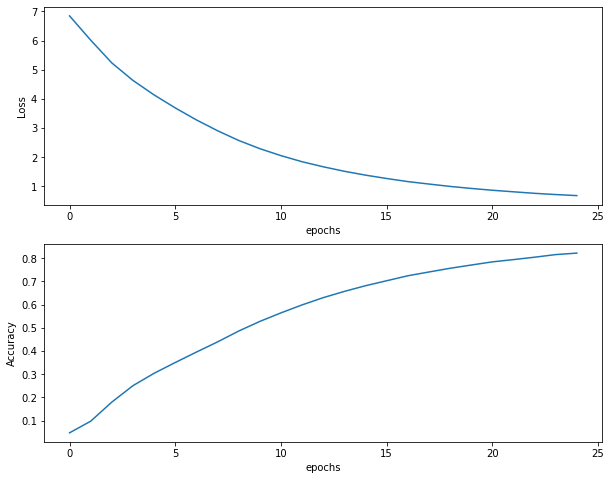

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))
axs[0].plot(history.history['loss'])
axs[0].set(xlabel='epochs', ylabel='Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set(xlabel='epochs', ylabel='Accuracy')
plt.show()

<b>
Bidirectional LSTM model

In [21]:
bilstm = BidirectLSTM_model().model

In [22]:
bilstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 128)           2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 29, 256)           263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 20000)             2580000   
Total params: 5,830,304
Trainable params: 5,830,304
Non-trainable params: 0
_________________________________________________________________


In [23]:
bilstm.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [24]:
history = bilstm.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/25
5995/5995 - 855s - loss: 6.5519 - accuracy: 0.0625
Epoch 2/25
5995/5995 - 915s - loss: 20327.9551 - accuracy: 0.1422
Epoch 3/25
5995/5995 - 913s - loss: 4.9342 - accuracy: 0.2058
Epoch 4/25
5995/5995 - 862s - loss: 4.4388 - accuracy: 0.2586
Epoch 5/25
5995/5995 - 830s - loss: 3.9838 - accuracy: 0.3078
Epoch 6/25
5995/5995 - 872s - loss: 3.5647 - accuracy: 0.3528
Epoch 7/25
5995/5995 - 816s - loss: 3.1744 - accuracy: 0.3981
Epoch 8/25
5995/5995 - 852s - loss: 2.8126 - accuracy: 0.4446
Epoch 9/25
5995/5995 - 907s - loss: 2.4938 - accuracy: 0.4901
Epoch 10/25
5995/5995 - 891s - loss: 2.1938 - accuracy: 0.5373
Epoch 11/25
5995/5995 - 902s - loss: 1.9250 - accuracy: 0.5791
Epoch 12/25
5995/5995 - 888s - loss: 1.6862 - accuracy: 0.6212
Epoch 13/25
5995/5995 - 896s - loss: 1.4766 - accuracy: 0.6603
Epoch 14/25
5995/5995 - 891s - loss: 1.3034 - accuracy: 0.6916
Epoch 15/25
5995/5995 - 845s - loss: 1.1341 - accuracy: 0.7267
Epoch 16/25
5995/5995 - 790s - loss: 1.0101 - accuracy: 0.75

Plot of loss and accuracy

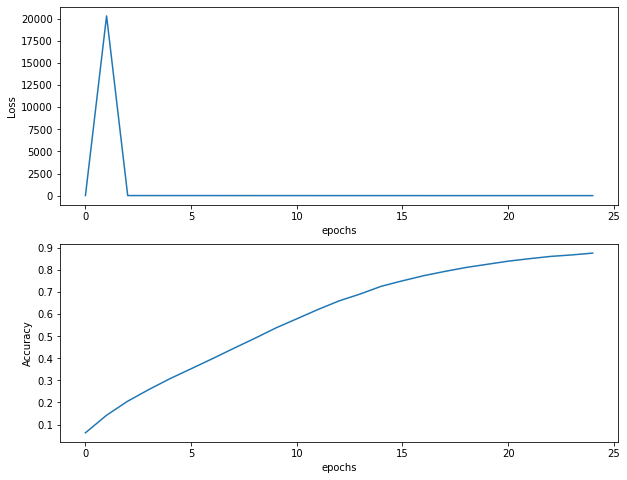

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))
axs[0].plot(history.history['loss'])
axs[0].set(xlabel='epochs', ylabel='Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set(xlabel='epochs', ylabel='Accuracy')
plt.show()

# Text generation

In [26]:
def text_generation(input_text, numberofwords, model, max_length, word_dict):
    temp = pd.DataFrame([input_text]).squeeze(axis=0)
    temp = clean_doc(temp)
    text = temp.tolist()[0]
    for _ in range(numberofwords):
        seq = tokenizer.texts_to_sequences([text])
        doc = pad_sequences(seq, maxlen=max_length, padding='pre')
        pred = model.predict_classes(doc, verbose=0)
        output_word = word_dict[pred[0]]
        text += (" " + output_word)
    return text

In [27]:
dict = tokenizer.word_index
word_dict = {v:k for k,v in dict.items()}

In [28]:
text_list = ['My sky is yours', 'Ha ... my true love', 'Oh! My dear', 'Love me do', 'I am a lemon tree']

In [29]:
def new_text(text_list, numberofwords, model, max_length, word_dict):
    newtext_list = []
    for text in text_list:
        newtext_list.append(text_generation(text, numberofwords, model, max_length, word_dict))
    return newtext_list

In [30]:
result = pd.DataFrame(index=text_list)
result['LSTM'] = new_text(text_list, 5, lstm, max_length, word_dict)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
result['Birectional LSTM'] = new_text(text_list, 5, bilstm, max_length, word_dict)

In [32]:
result

,LSTM,Birectional LSTM
My sky is yours,my sky is yours by renan silva y pe,my sky is yours supreme freedom sacrifice supr...
Ha ... my true love,ha my true love all drought by dandan alice,ha my true love repeat chorus x s instrumental
Oh! My dear,oh my dear unity nine instrumental x por,oh my dear creature my my my my
Love me do,love me do not stop it t x,love me do not matter twice forever nice
I am a lemon tree,i am a lemon tree m monster record beast beast,i am a lemon tree royal rising rising ring ring


The models can generate the text. However, it is not good enough to use for writing lyrics.

Reference:
    <li> https://www.kaggle.com/code/shivamb/beginners-guide-to-text-generation-using-lstms/notebook
    <li> https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/
    <li> https://www.analyticsvidhya.com/blog/2021/08/text-generation-using-bidirectional-lstm-a-walk-through-in-tensorflow/